In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.impute import SimpleImputer
import json


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv(r"C:\Users\Asus\Downloads\adult\adult.csv")
data 


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.shape

(48842, 15)

In [8]:
def data_explore(df):
    shape = df.shape
    columns =df.columns
    numerical_columns  = [x for x in columns if df[x].dtype !='O']
    cat_columns  = [x for x in columns if df[x].dtype =='O']
    data={
        "shape" : shape,
        "columns" : len(list(columns)),
        "numerical_columns":len(list(numerical_columns)),
        "categorical columns" : cat_columns
    }
    print(json.dumps(data, indent=4))

In [9]:
data_explore(data)

{
    "shape": [
        48842,
        15
    ],
    "columns": 15,
    "numerical_columns": 6,
    "categorical columns": [
        "workclass",
        "education",
        "marital-status",
        "occupation",
        "relationship",
        "race",
        "gender",
        "native-country",
        "income"
    ]
}


In [10]:
data.duplicated().value_counts() 

False    48790
True        52
Name: count, dtype: int64

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.duplicated().value_counts() 

False    48790
Name: count, dtype: int64

In [13]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
data.replace('?', np.nan, inplace=True)

In [15]:
data.isnull().sum()

age                   0
workclass          2795
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [16]:
per_missing=data.isnull().sum()*100/len(data)
per_missing

age                0.000000
workclass          5.728633
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.749129
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754458
income             0.000000
dtype: float64

In [17]:
data.dropna(how='any',inplace=True)

In [18]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [19]:
categorical_features = data.select_dtypes(object)
numerical_features = data.select_dtypes(exclude=object)

<Axes: xlabel='count', ylabel='workclass'>

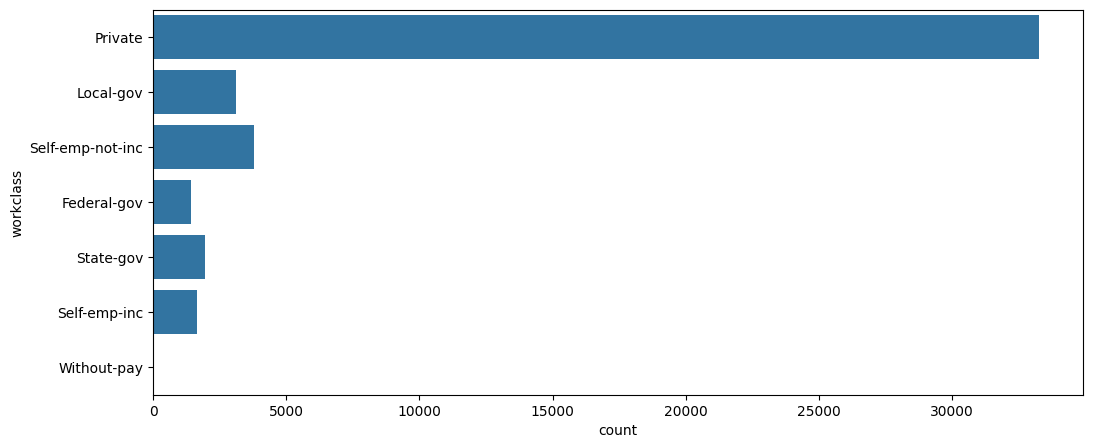

In [20]:
cfig = plt.figure(figsize=(12,5))
sns.countplot(data['workclass'])

<Axes: xlabel='count', ylabel='occupation'>

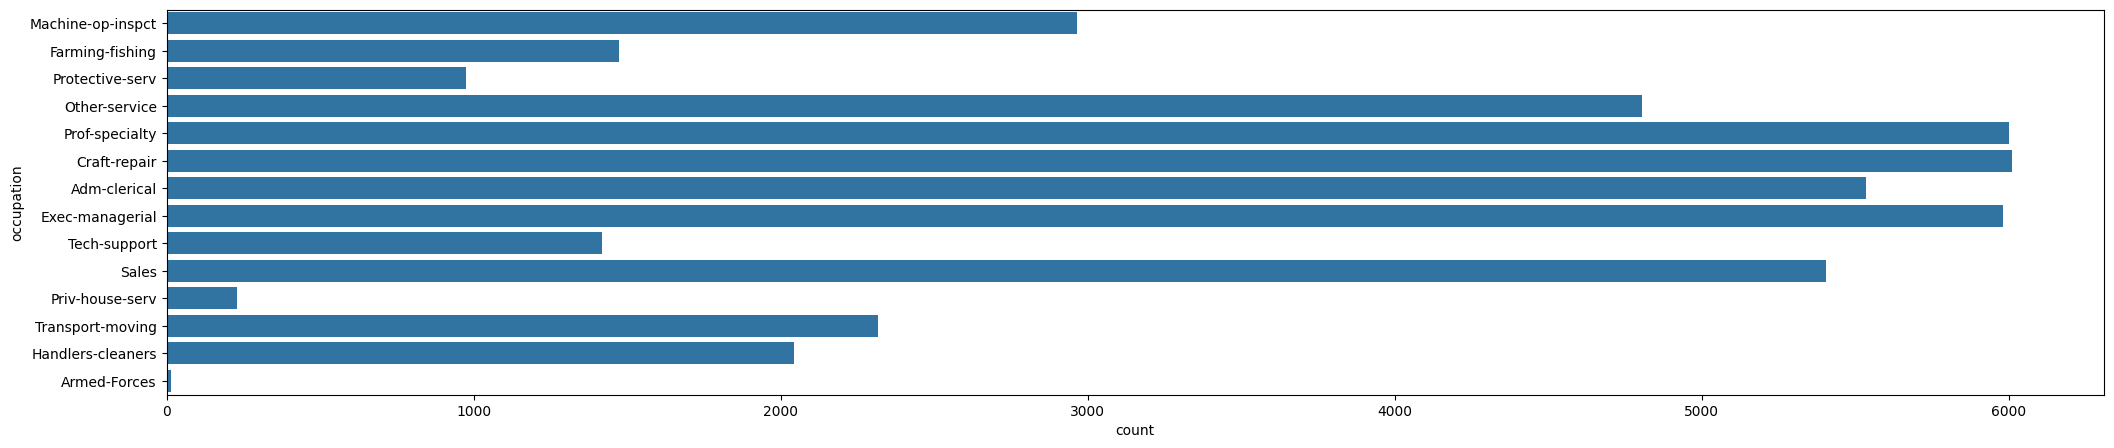

In [21]:
fig = plt.figure(figsize=(25,5))
sns.countplot(data['occupation'])

<Axes: xlabel='count', ylabel='education'>

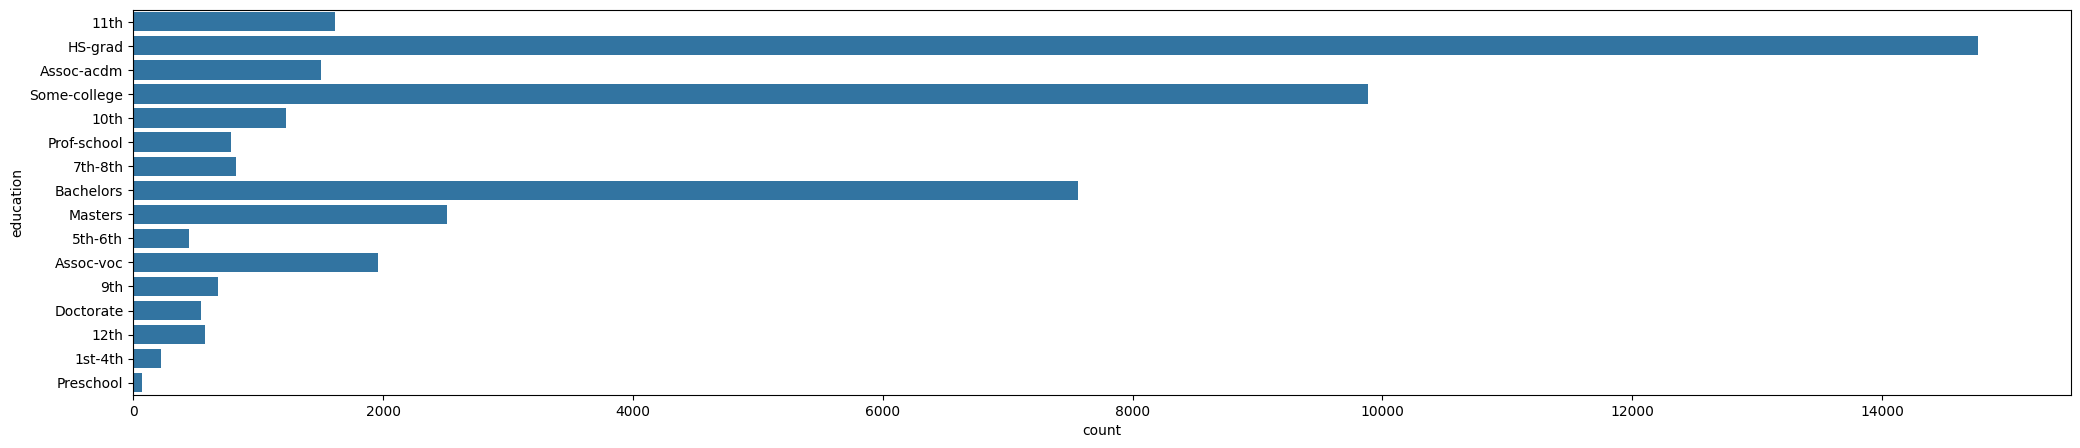

In [22]:
fig = plt.figure(figsize=(25,5))
sns.countplot(data['education'])

<Axes: xlabel='count', ylabel='marital-status'>

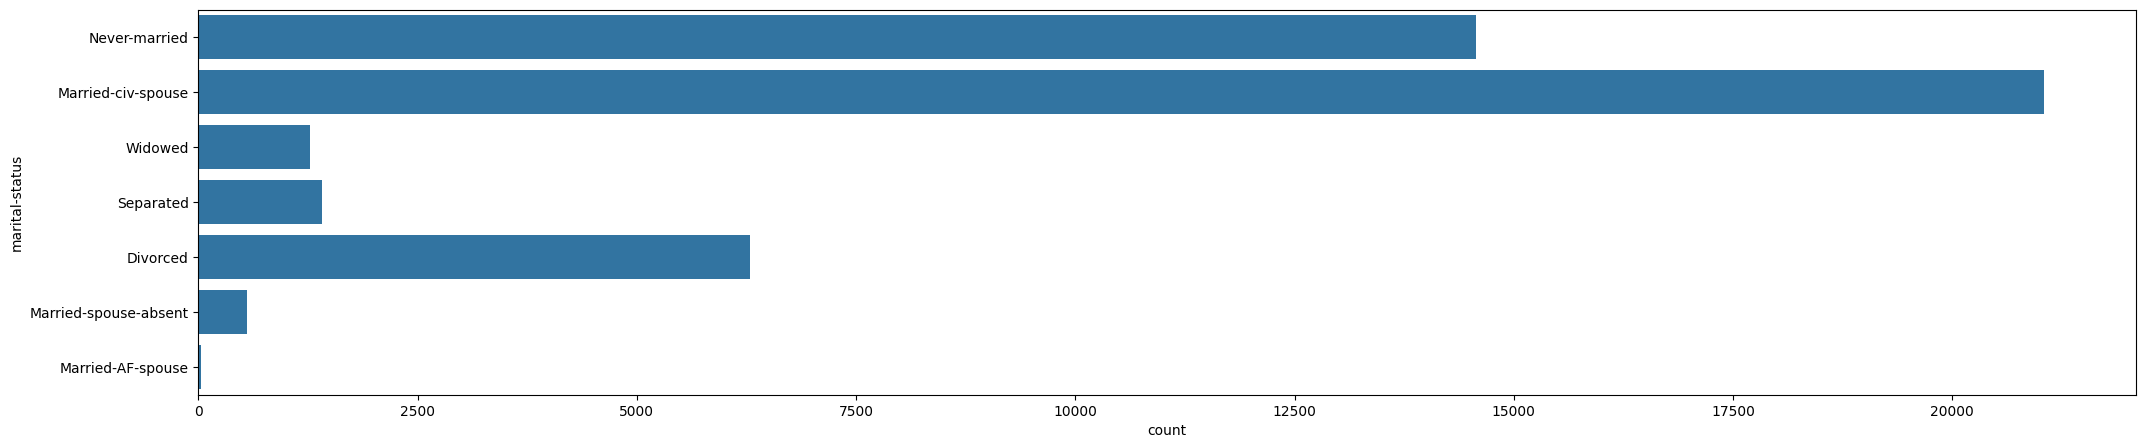

In [23]:
fig = plt.figure(figsize=(25,5))
sns.countplot(data['marital-status'])

<Axes: xlabel='count', ylabel='relationship'>

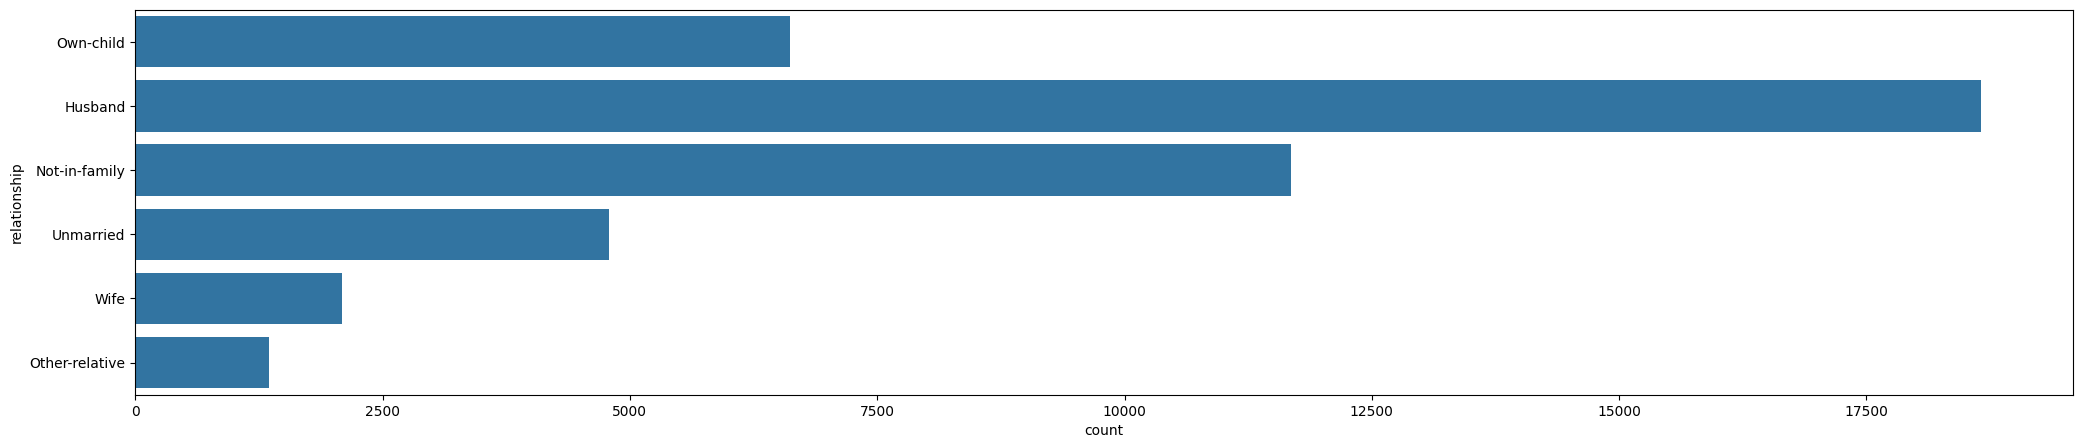

In [24]:
fig = plt.figure(figsize=(25,5))
sns.countplot(data['relationship'])

<Axes: xlabel='count', ylabel='race'>

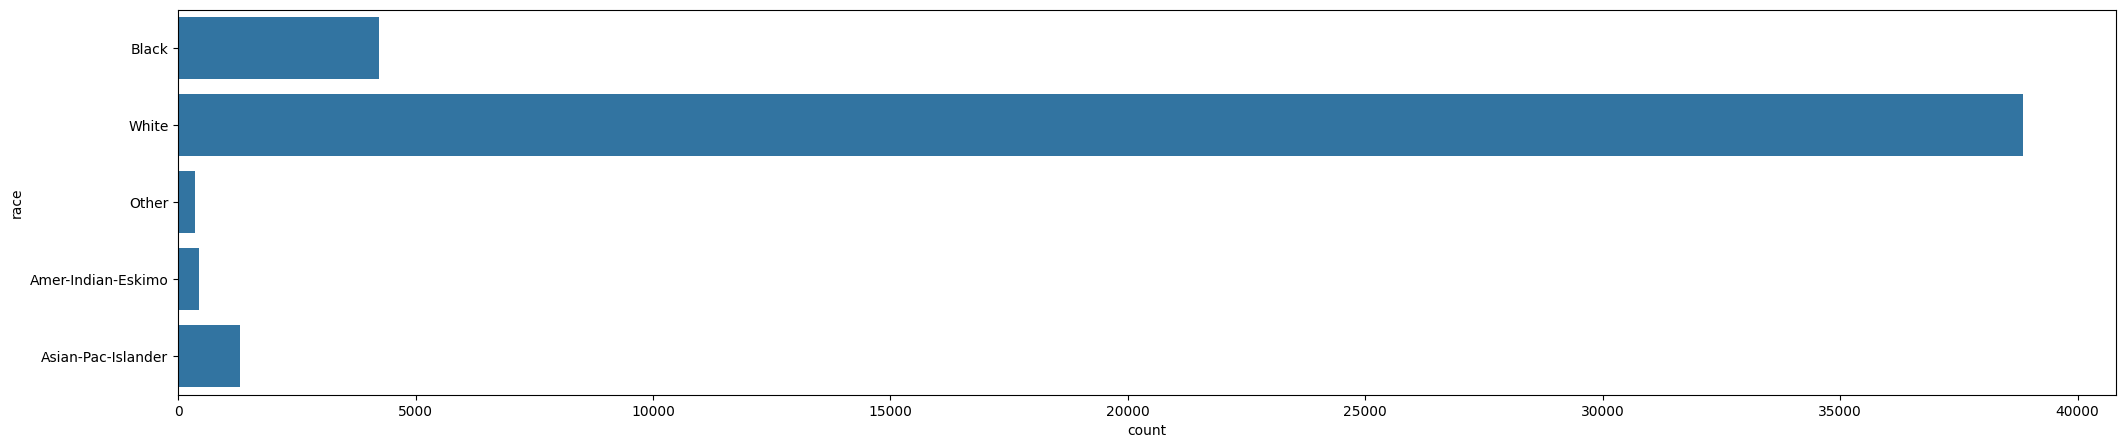

In [25]:
fig = plt.figure(figsize=(25,5))
sns.countplot(data['race'])

In [26]:
data['native-country'].value_counts().head()

native-country
United-States    41256
Mexico             895
Philippines        282
Germany            193
Puerto-Rico        175
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='income'>

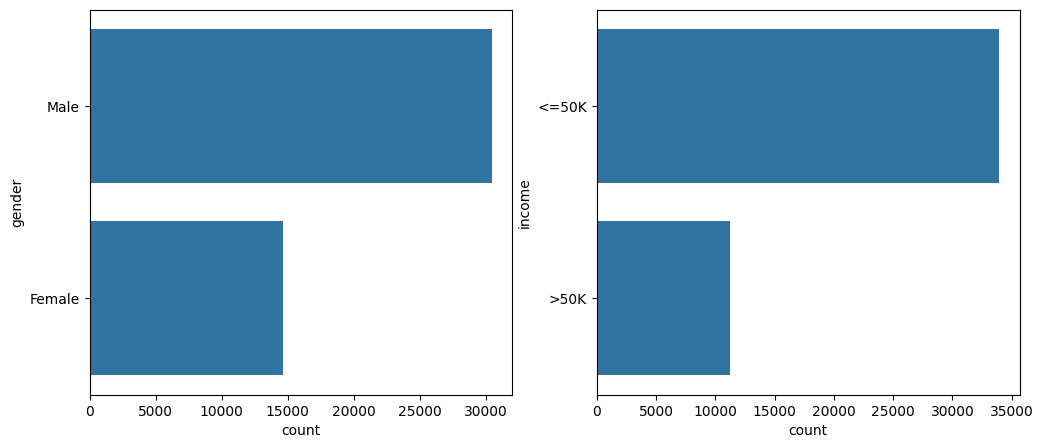

In [27]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.countplot(data['gender'], ax = ax[0])
sns.countplot(data['income'], ax = ax[1])

In [28]:
income_by_occupation = data.groupby('occupation')['income'].apply(
    lambda x: (x == '>50K').mean() * 100
).sort_values(ascending=False)

print("Percentage of individuals earning >50K by occupation:")
print(income_by_occupation)


Percentage of individuals earning >50K by occupation:
occupation
Exec-managerial      47.909699
Prof-specialty       45.025829
Protective-serv      31.487179
Tech-support         28.964059
Armed-Forces         28.571429
Sales                26.919519
Craft-repair         22.529118
Transport-moving     20.639033
Adm-clerical         13.658537
Machine-op-inspct    12.276560
Farming-fishing      11.661017
Handlers-cleaners     6.601467
Other-service         4.079084
Priv-house-serv       1.304348
Name: income, dtype: float64


In [29]:
threshold = 0.3
data['occupation_class'] = data['occupation'].apply(
    lambda x: "Professional role" if x in income_by_occupation[income_by_occupation > threshold*100].index else "Entry-level role"
)
print("\nDistribution of occupation classes:")
print(data['occupation_class'].value_counts())



Distribution of occupation classes:
occupation_class
Entry-level role     32219
Professional role    12956
Name: count, dtype: int64


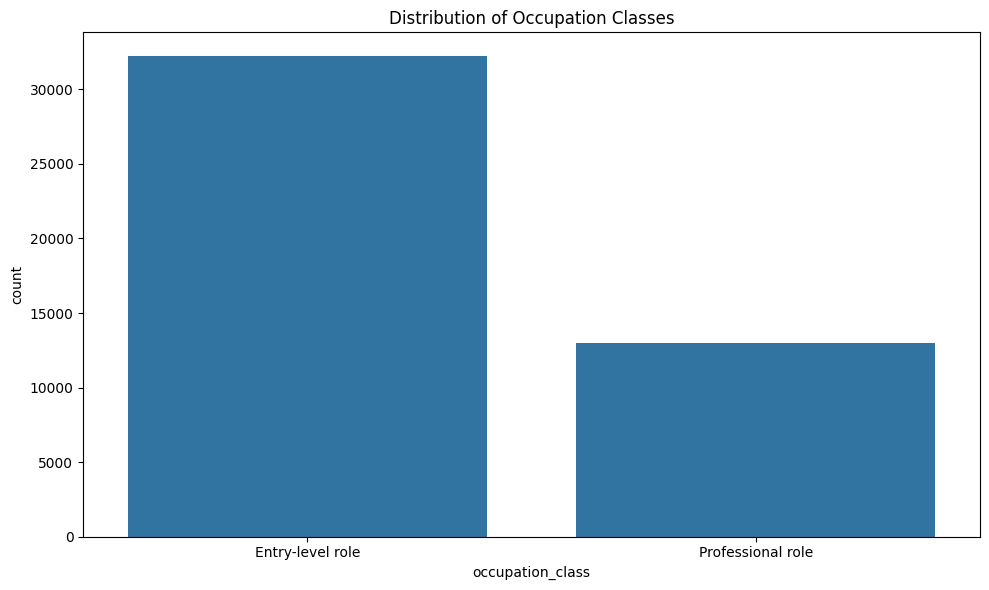

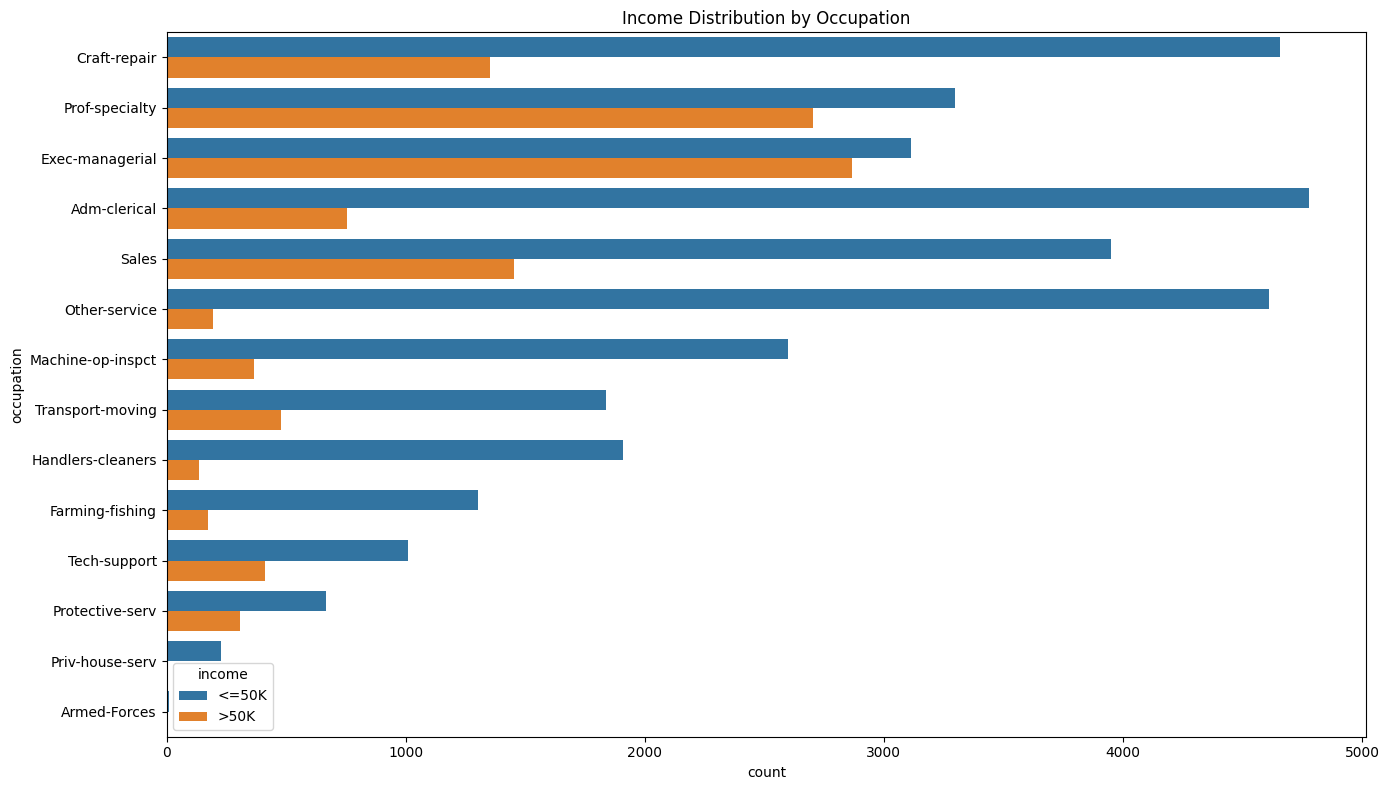

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation_class', data=data)
plt.title('Distribution of Occupation Classes')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(y='occupation', hue='income', data=data, order=data['occupation'].value_counts().index)
plt.title('Income Distribution by Occupation')
plt.tight_layout()
plt.show()

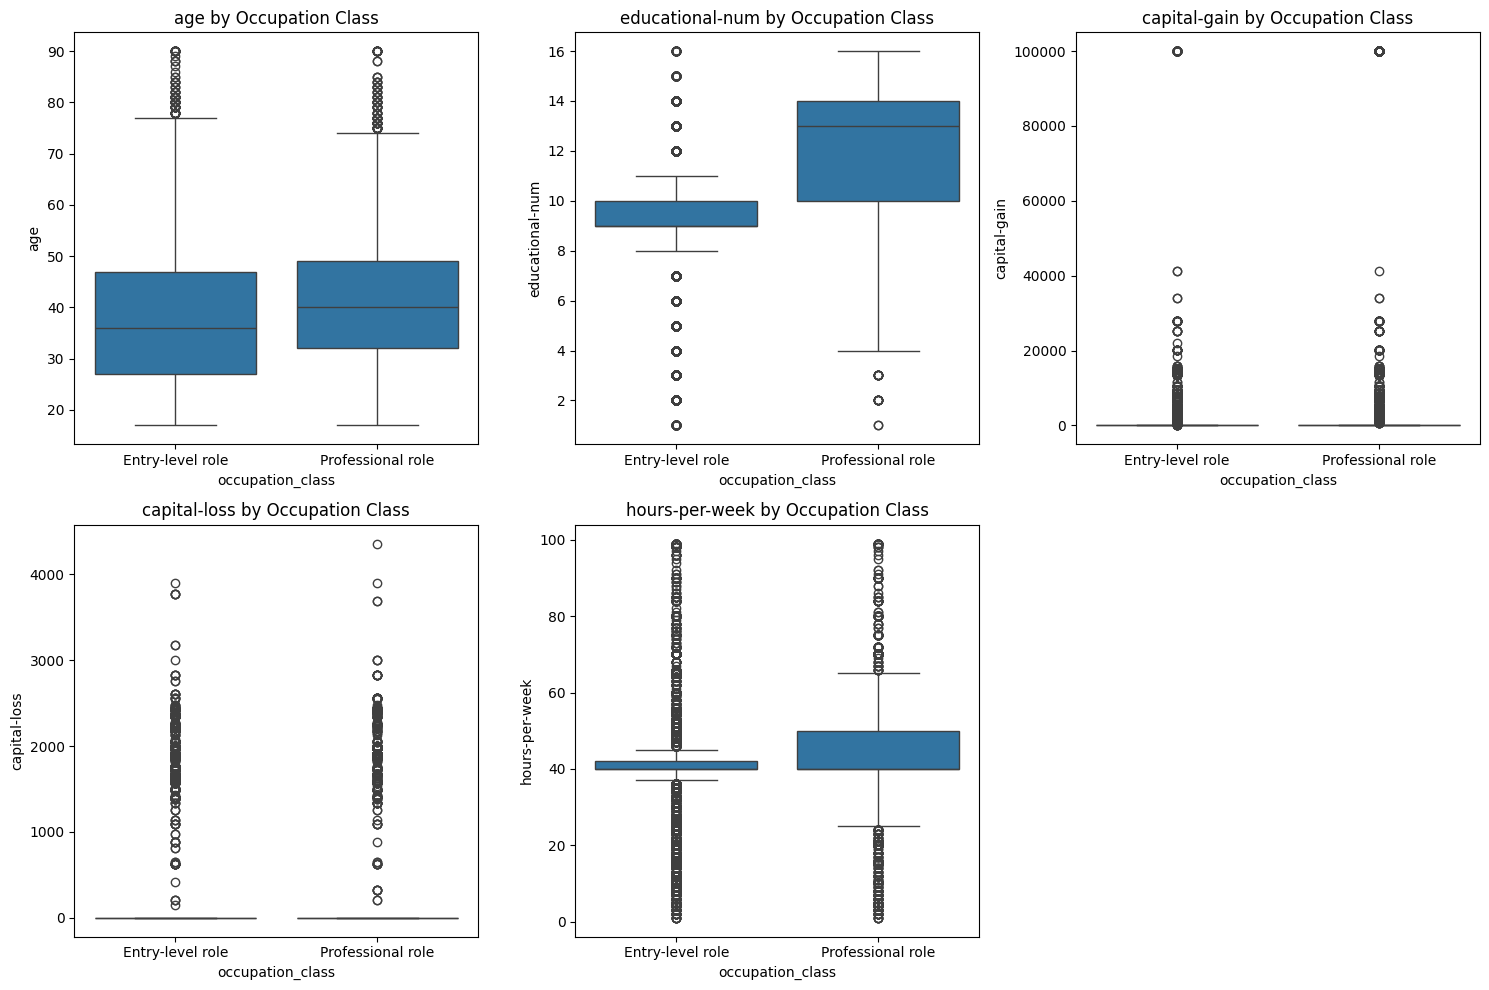

Outliers in age: 268 (0.59%)
Lower bound: -0.5, Upper bound: 75.5
Min value: 17, Max value: 90
Outliers in educational-num: 290 (0.64%)
Lower bound: 3.0, Upper bound: 19.0
Min value: 1, Max value: 16
Outliers in capital-gain: 3790 (8.39%)
Lower bound: 0.0, Upper bound: 0.0
Min value: 0, Max value: 99999
Outliers in capital-loss: 2140 (4.74%)
Lower bound: 0.0, Upper bound: 0.0
Min value: 0, Max value: 4356
Outliers in hours-per-week: 11889 (26.32%)
Lower bound: 32.5, Upper bound: 52.5
Min value: 1, Max value: 99


In [31]:
numeric_cols = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='occupation_class', y=col, data=data)
    plt.title(f'{col} by Occupation Class')
plt.tight_layout()
plt.show()

# IQR
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers, lower_bound, upper_bound

for col in numeric_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data, col)
    print(f"Outliers in {col}: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Min value: {data[col].min()}, Max value: {data[col].max()}")

In [32]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
categorical_cols = data.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('occupation_class')  

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col + '_encoded'] = le.fit_transform(data[col])
    label_encoders[col] = le

scaler = StandardScaler()
data[numeric_cols + ['fnlwgt']] = scaler.fit_transform(data[numeric_cols + ['fnlwgt']])


encoded_categorical_cols = [col + '_encoded' for col in categorical_cols]
features = numeric_cols + ['fnlwgt'] + encoded_categorical_cols
X = data[features]
y = data['occupation_class']



In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data prepared for modeling:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")



Data prepared for modeling:
X_train shape: (31622, 15)
X_test shape: (13553, 15)


Training Random Forest...
12010     Entry-level role
12197     Entry-level role
4488      Entry-level role
23026     Entry-level role
19544     Entry-level role
               ...        
47319    Professional role
48245     Entry-level role
17726     Entry-level role
35382     Entry-level role
16843    Professional role
Name: occupation_class, Length: 13553, dtype: object ['Entry-level role' 'Entry-level role' 'Entry-level role' ...
 'Entry-level role' 'Entry-level role' 'Professional role']
Accuracy: 0.9973
Classification Report:
                   precision    recall  f1-score   support

 Entry-level role       1.00      1.00      1.00      9656
Professional role       0.99      1.00      1.00      3897

         accuracy                           1.00     13553
        macro avg       1.00      1.00      1.00     13553
     weighted avg       1.00      1.00      1.00     13553

Confusion Matrix:


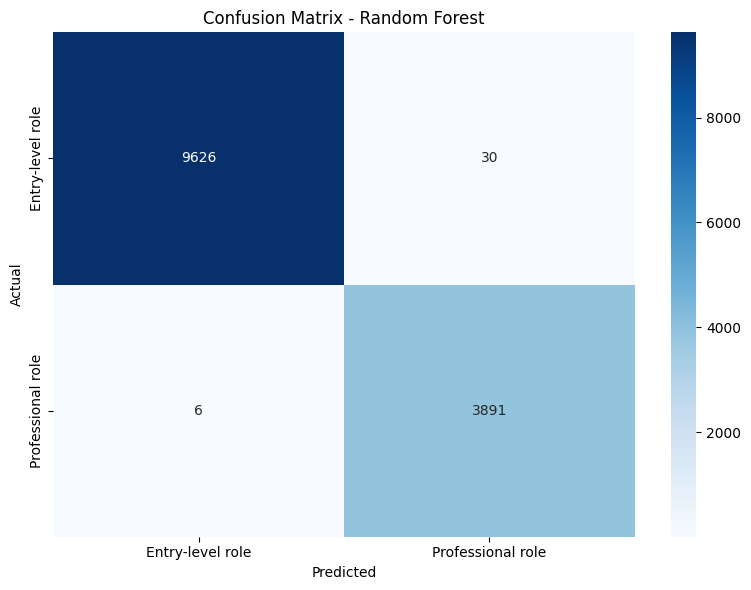

Training Logistic Regression...
12010     Entry-level role
12197     Entry-level role
4488      Entry-level role
23026     Entry-level role
19544     Entry-level role
               ...        
47319    Professional role
48245     Entry-level role
17726     Entry-level role
35382     Entry-level role
16843    Professional role
Name: occupation_class, Length: 13553, dtype: object ['Entry-level role' 'Entry-level role' 'Entry-level role' ...
 'Entry-level role' 'Entry-level role' 'Entry-level role']
Accuracy: 0.8004
Classification Report:
                   precision    recall  f1-score   support

 Entry-level role       0.82      0.91      0.87      9656
Professional role       0.71      0.52      0.60      3897

         accuracy                           0.80     13553
        macro avg       0.77      0.72      0.73     13553
     weighted avg       0.79      0.80      0.79     13553

Confusion Matrix:


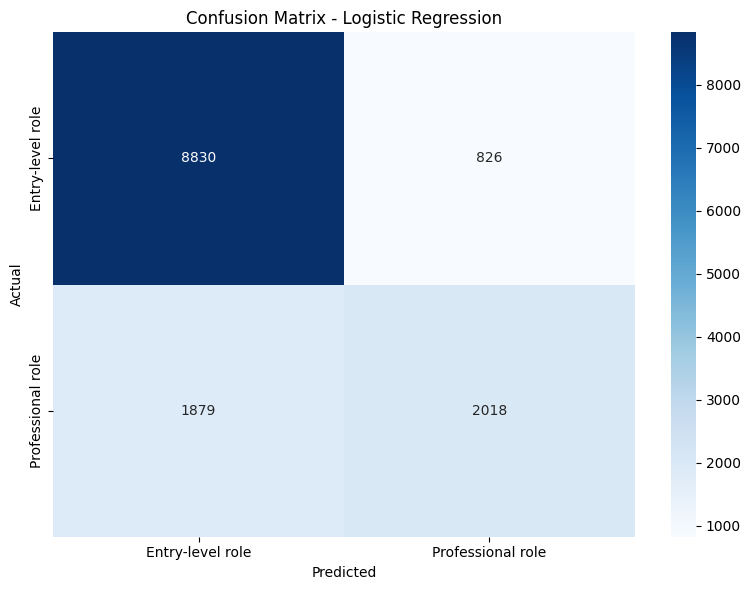

Training Support Vector Machine...
12010     Entry-level role
12197     Entry-level role
4488      Entry-level role
23026     Entry-level role
19544     Entry-level role
               ...        
47319    Professional role
48245     Entry-level role
17726     Entry-level role
35382     Entry-level role
16843    Professional role
Name: occupation_class, Length: 13553, dtype: object ['Entry-level role' 'Entry-level role' 'Entry-level role' ...
 'Entry-level role' 'Entry-level role' 'Entry-level role']
Accuracy: 0.8439
Classification Report:
                   precision    recall  f1-score   support

 Entry-level role       0.86      0.93      0.89      9656
Professional role       0.79      0.62      0.70      3897

         accuracy                           0.84     13553
        macro avg       0.82      0.78      0.80     13553
     weighted avg       0.84      0.84      0.84     13553

Confusion Matrix:


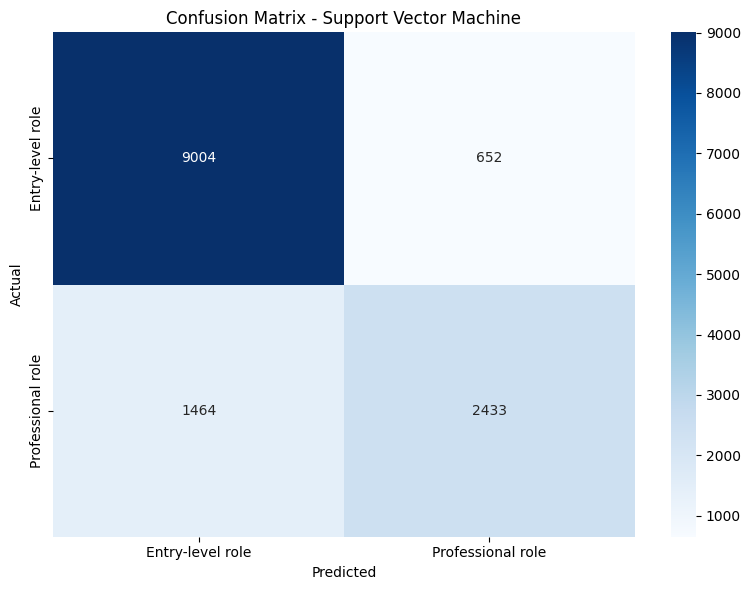

Training Decision Tree...
12010     Entry-level role
12197     Entry-level role
4488      Entry-level role
23026     Entry-level role
19544     Entry-level role
               ...        
47319    Professional role
48245     Entry-level role
17726     Entry-level role
35382     Entry-level role
16843    Professional role
Name: occupation_class, Length: 13553, dtype: object ['Entry-level role' 'Entry-level role' 'Entry-level role' ...
 'Entry-level role' 'Entry-level role' 'Professional role']
Accuracy: 1.0000
Classification Report:
                   precision    recall  f1-score   support

 Entry-level role       1.00      1.00      1.00      9656
Professional role       1.00      1.00      1.00      3897

         accuracy                           1.00     13553
        macro avg       1.00      1.00      1.00     13553
     weighted avg       1.00      1.00      1.00     13553

Confusion Matrix:


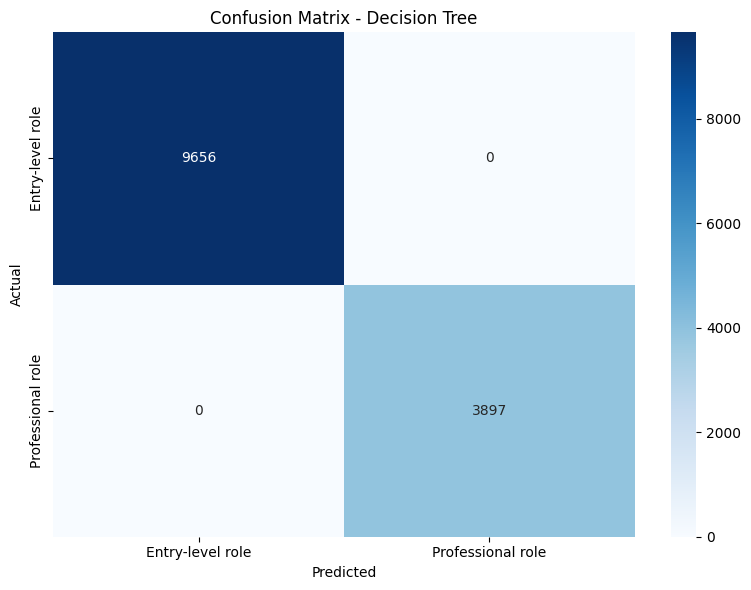

Training K-Nearest Neighbors...
12010     Entry-level role
12197     Entry-level role
4488      Entry-level role
23026     Entry-level role
19544     Entry-level role
               ...        
47319    Professional role
48245     Entry-level role
17726     Entry-level role
35382     Entry-level role
16843    Professional role
Name: occupation_class, Length: 13553, dtype: object ['Entry-level role' 'Entry-level role' 'Entry-level role' ...
 'Entry-level role' 'Entry-level role' 'Professional role']
Accuracy: 0.9602
Classification Report:
                   precision    recall  f1-score   support

 Entry-level role       0.97      0.98      0.97      9656
Professional role       0.94      0.92      0.93      3897

         accuracy                           0.96     13553
        macro avg       0.95      0.95      0.95     13553
     weighted avg       0.96      0.96      0.96     13553

Confusion Matrix:


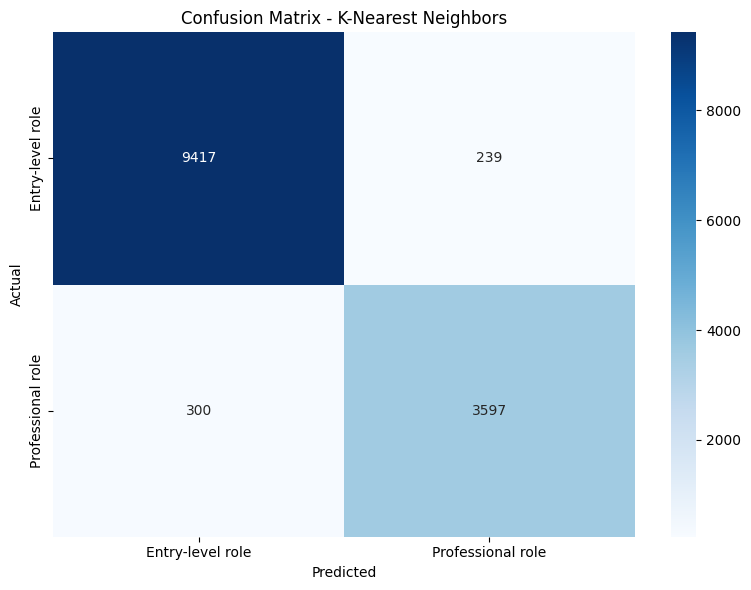


Best performing model: Decision Tree with accuracy 1.0000


In [40]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}


results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()
    

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest performing model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

    

In [38]:
def predict_occupation_class(age, workclass, education, marital_status, 
                           relationship, race, sex, capital_gain, 
                           capital_loss, hours_per_week, native_country):
    # Create a DataFrame with the input data
    input_data = pd.DataFrame({
        'age': [age],
        'workclass': [workclass],
        'education': [education],
        'marital-status': [marital_status],
        'relationship': [relationship],
        'race': [race],
        'sex': [sex],
        'capital-gain': [capital_gain],
        'capital-loss': [capital_loss],
        'hours-per-week': [hours_per_week],
        'native-country': [native_country],
    })
    
    # Add dummy values for other required columns
    input_data['fnlwgt'] = 0
    input_data['educational-num'] = 0
    # Map education to education-num
    education_num_map = data[['education','educational-num']].drop_duplicates().set_index('education')['educational-num']
    input_data['educational-num'] = input_data['education'].map(education_num_map).fillna(0)
    
    # Encode categorical variables
    for col in categorical_cols:
        if col in input_data.columns:
            le = label_encoders[col]
            try:
                input_data[col + '_encoded'] = le.transform(input_data[col])
            except:
                # Handle unseen categories
                input_data[col + '_encoded'] = 0
    
    # Standardize numeric features
    numeric_input = input_data[numeric_cols + ['fnlwgt']]
    input_data[numeric_cols + ['fnlwgt']] = scaler.transform(numeric_input)
    
    # Prepare features for prediction
    input_features = input_data[features]
    
    # Make prediction using the best model
    prediction = best_model.predict(input_features)[0]
    proba = best_model.predict_proba(input_features)[0]
    
    # Return prediction and confidence
    confidence = proba[list(best_model.classes_).index(prediction)]
    return prediction, confidence

# Example usage of the prediction function
example_prediction, confidence = predict_occupation_class(
    age=35,
    workclass='Private',
    education='Bachelors',
    marital_status='Married-civ-spouse',
    relationship='Husband',
    race='White',
    sex='Male',
    capital_gain=0,
    capital_loss=0,
    hours_per_week=40,
    native_country='United-States'
)

print("\nExample Prediction:")
print(f"Predicted occupation class: {example_prediction}")
print(f"Confidence: {confidence:.4f}")

KeyError: "['occupation_encoded', 'gender_encoded', 'income_encoded'] not in index"

In [41]:
def predict_occupation_class(age, workclass, education, marital_status, 
                           relationship, race, sex, capital_gain, 
                           capital_loss, hours_per_week, native_country):
    """
    Predicts occupation class based on the input features.
    """
    # Create a DataFrame with the input data
    input_data = pd.DataFrame({
        'age': [age],
        'workclass': [workclass],
        'education': [education],
        'marital-status': [marital_status],
        'relationship': [relationship],
        'race': [race],
        'sex': [sex],
        'capital-gain': [capital_gain],
        'capital-loss': [capital_loss],
        'hours-per-week': [hours_per_week],
        'native-country': [native_country],
    })
    
    # Add dummy values for other required columns
    input_data['fnlwgt'] = 0
    
    # Fix: Use the correct column name 'education-num' or 'educational-num'
    # depending on what's in your original dataset
    if 'educational-num' in data.columns:
        education_num_map = data[['education','educational-num']].drop_duplicates().set_index('education')['educational-num']
        input_data['educational-num'] = input_data['education'].map(education_num_map).fillna(0)
    elif 'education-num' in data.columns:
        education_num_map = data[['education','education-num']].drop_duplicates().set_index('education')['education-num']
        input_data['education-num'] = input_data['education'].map(education_num_map).fillna(0)
    
    # Create a DataFrame with only the features needed for prediction
    prediction_features = pd.DataFrame(index=input_data.index)
    
    # Add numeric features first
    for col in numeric_cols:
        if col in input_data.columns:
            prediction_features[col] = input_data[col]
    
    # Add fnlwgt
    prediction_features['fnlwgt'] = 0
    
    # Handle categorical features
    for col in categorical_cols:
        if col in input_data.columns:
            if col in label_encoders:
                le = label_encoders[col]
                try:
                    # Try to transform the value using the encoder
                    prediction_features[col + '_encoded'] = le.transform(input_data[col])
                except ValueError:
                    # If the category is unknown, use the most frequent category
                    print(f"Warning: Unknown category in {col}: {input_data[col].values[0]}")
                    prediction_features[col + '_encoded'] = 0
    
    # Ensure all features used by the model are present
    missing_features = set(features) - set(prediction_features.columns)
    for feature in missing_features:
        prediction_features[feature] = 0
        print(f"Warning: Added missing feature {feature} with default value 0")
    
    # Ensure features are in the same order as during training
    prediction_features = prediction_features[features]
    
    # Scale the numeric features
    numeric_features_present = [col for col in numeric_cols + ['fnlwgt'] if col in prediction_features.columns]
    if numeric_features_present:
        prediction_features[numeric_features_present] = scaler.transform(prediction_features[numeric_features_present])
    
    # Make prediction using the best model
    prediction = best_model.predict(prediction_features)[0]
    proba = best_model.predict_proba(prediction_features)[0]
    
    # Return prediction and confidence
    confidence = proba[list(best_model.classes_).index(prediction)]
    return prediction, confidence

# Example usage of the prediction function
example_prediction, confidence = predict_occupation_class(
    age=35,
    workclass='Private',
    education='Bachelors',
    marital_status='Married-civ-spouse',
    relationship='Husband',
    race='White',
    sex='Male',
    capital_gain=0,
    capital_loss=0,
    hours_per_week=40,
    native_country='United-States'
)

print("\nExample Prediction:")
print(f"Predicted occupation class: {example_prediction}")
print(f"Confidence: {confidence:.4f}")


Example Prediction:
Predicted occupation class: Entry-level role
Confidence: 1.0000
